## Assignment 2: Linear Regression Analysis of Years of Experience and Salary （20 marks）

**Background:**
Suppose a company has collected data on its employees, including their years of experience and corresponding salaries. The goal is to analyze the relationship between years of experience and salary using linear regression and predict future salaries based on this relationship.

**Task Description:**
1. You will be provided with a CSV file containing two columns:
   - **Years of Experience**: The number of years an employee has worked.
   - **Salary**: The salary of the employee.
   
2. Complete the code in the blanks to accomplish the following tasks:
   - **Split Dataset**: Split the given dataset into training and testing sets.
   - **Initialization and Plotting**: Initialize parameters for linear regression and visualize the dataset.
   - **Gradient Descent**: Implement the gradient descent algorithm to optimize the slope and bias.
   - **Result Plotting**: Plot the fitted regression line along with the training and testing data.
   - **Analysis**: Find out what can be improved and enhanced in the given program.


### Task 1. Split Dataset (2 marks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_df = pd.read_csv("Salary_dataset.csv") # Import the Salary dataset.
X = data_df["YearsExperience"].to_numpy().tolist()   # Separate data into features and labels
y = data_df["Salary"].to_numpy().tolist()


# Divide the dataset into training and test data in a ratio of 2:1 (2 marks)
split_index = int(len(X) * 2 / 3)
train_X, train_y = X[:split_index], y[:split_index] 
test_X, test_y = X[split_index:], y[split_index:]

### Task 2. Initialization and Plotting (4 marks)

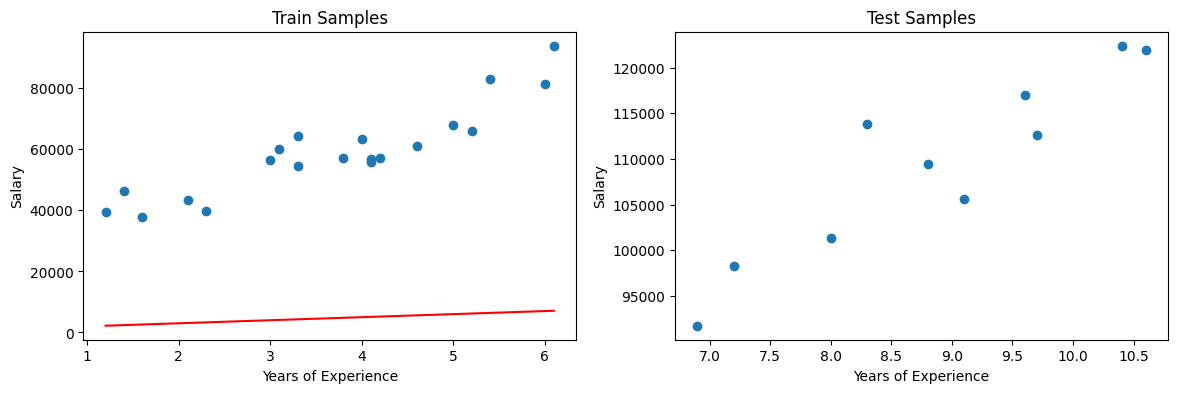

In [2]:
slope = 1000.0
bias = 1000.0
y_pred = []   # Calculate y_pred based on training feature and weights (1 mark)
for i in train_X:
    y_pred.append(i * slope + bias)

plt.figure(figsize=[14,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(train_X, train_y)        # Draw the training samples in the figure (1 mark)   
plt.plot(train_X, y_pred, c="red")  # Draw the initialized line in the figure (1 mark)


plt.subplot(1,2,2)
plt.title("Test Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(test_X, test_y)  # Draw the test samples in the figure (1 mark)

### Task 3. Gradient Descent (10 marks)

In [13]:
alpha=0.0001         # Initialize the learning rate        

for iteration in range(500000):
    
    # Calculate y_pred for each iteration (2 mark)
    y_pred = []
    for i in train_X:
        y_pred.append(i * slope + bias)
        
    # Update the slope and bias using Gradient Descent (8 marks)
    slope_samples_gradient_list = []
    for i in range(len(train_X)):
        slope_one_sample_gradient = (slope * train_X[i] + bias - train_y[i]) * train_X[i]
        slope_samples_gradient_list.append(slope_one_sample_gradient)
    slope -= alpha * sum(slope_samples_gradient_list)

    bias_samples_gradient_list = []
    for i in range(len(train_X)):
        bias_one_sample_gradient = slope * train_X[i] + bias - train_y[i]
        bias_samples_gradient_list.append(bias_one_sample_gradient)
    bias -= alpha * sum(bias_samples_gradient_list)

### Task 4. Result Plotting (2 marks)

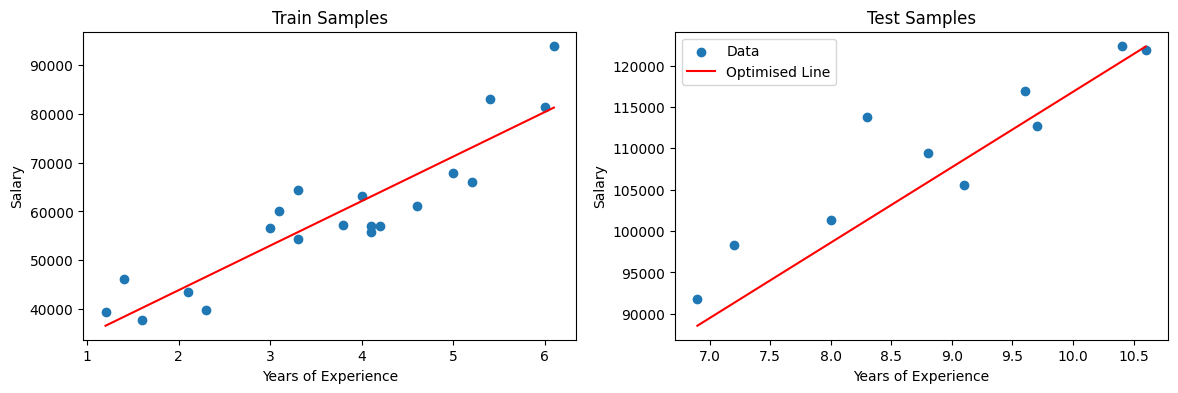

In [14]:
y_pred_train = []
for i in train_X:
    y_pred_train.append(i * slope + bias)

y_pred_test = []
for i in test_X:
    y_pred_test.append(i * slope + bias)

plt.figure(figsize=[14,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(train_X, train_y)        # Draw the training samples in the figure
plt.plot(train_X, y_pred_train, c="red")  # Draw the optimalized line in the figure (1 mark)

plt.subplot(1,2,2)
plt.title("Test Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(test_X, test_y)        # Draw the test samples in the figure
plt.plot(test_X, y_pred_test, c="red")  # Draw the optimalized line in the figure (1 mark)
plt.legend(["Data", "Optimised Line"])

### Task 5. Analysis (2 marks)
#### There is a flaw in the process given above, any improvements you think could be made to the above code? (text answer)

The code is missing a Cost Function calculation. We should calculate and track the Loss (Sum of Squared Errors) at each iteration. This allows us to monitor the training process and verify that the error is actually decreasing over time.